# Twitter Sentiment Analysis

## Dataset Description

The dataset is the Sentiment140 dataset from Kaggle. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

## Dataset Link

https://www.kaggle.com/kazanova/sentiment140

## Dataset Columns

0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

1 - the id of the tweet (2087)

2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)

3 - the query (lyx). If there is no query, then this value is NO_QUERY.

4 - the user that tweeted (robotickilldozr)

5 - the text of the tweet (Lyx is cool)


## Importing Libraries


In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darklord/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('./training.1600000.processed.noemoticon.csv',
                 encoding='ISO-8859-1', names=DATASET_COLUMNS)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
df.target.value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [9]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)

<Axes: xlabel='target', ylabel='count'>

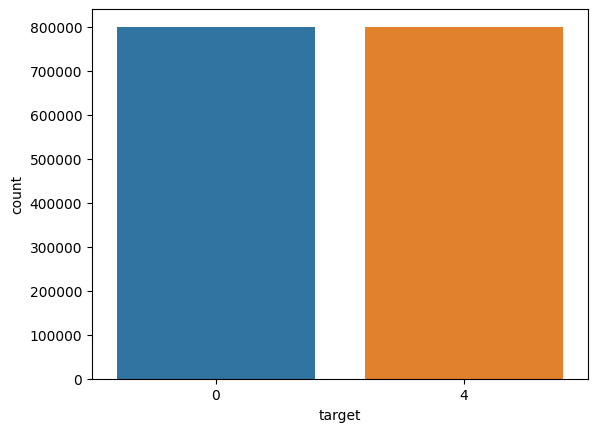

In [10]:
import seaborn as sns
sns.countplot(data=df, x='target')

In [12]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [13]:
def cleaning_text(x):
    return " ".join([w for w in str(x).split() if w not in stop_words])


df['text'] = df['text'].apply(cleaning_text)


In [14]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,upset can't update Facebook texting it... migh...
2,0,@Kenichan I dived many times ball. Managed sav...
3,0,whole body feels itchy like fire
4,0,"@nationwideclass no, not behaving all. i'm mad..."
